# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [1]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean
from scipy.stats import normaltest

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection 


# displaying markdown strings
from IPython.display import display, Markdown, Latex
pd.options.mode.chained_assignment = None

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

#### 1.1

In [2]:
data_path ="./data/pitchfork.csv.gz"
albums = pd.read_csv(data_path, compression="gzip")
print(f'length with duplicates: {len(albums):d}')
albums.drop_duplicates(subset=['artist', 'album'], keep='first', inplace=True)
print(f'length without duplicates: {len(albums):d}')

length with duplicates: 16785
length without duplicates: 16738


#### 1.2

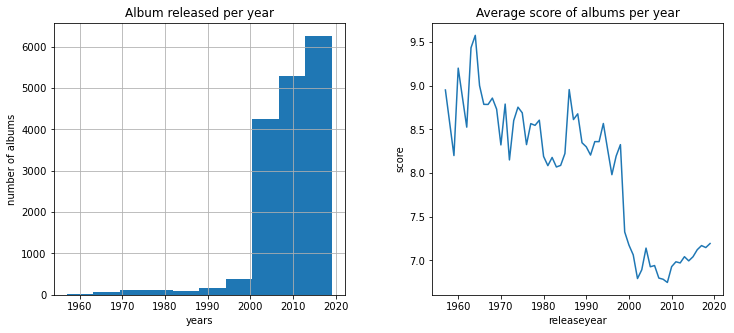

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
albums.hist(column="releaseyear", ax=ax[0])

avg_yearly_score = albums.groupby(by="releaseyear").aggregate(func='mean')
sns.lineplot(data= avg_yearly_score, x='releaseyear', y='score')
ax[0].set_title('Album released per year')
ax[1].set_title('Average score of albums per year')
ax[0].set_xlabel('years')
ax[0].set_ylabel('number of albums')
plt.show()

#### 1.3

In [4]:
albums.describe()

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,16738.000000,16738.000000,16738.000000,16738.000000,16738.000000,16738.000000,16738.000000,16738.000000,16738.000000,16738.000000,16738.000000,16738.000000
mean,7.048596,2009.346338,0.512334,0.601276,5.216501,-9.283268,0.090742,0.301914,0.274748,0.196402,0.405268,120.326487
std,1.247027,7.795465,0.158859,0.203196,1.613841,4.238371,0.090126,0.262392,0.298907,0.104933,0.182293,15.482320
min,0.000000,1957.000000,-1.000000,-1.000000,-1.000000,-51.728750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.500000,2005.000000,0.408900,0.474000,4.333333,-11.217535,0.040633,0.091104,0.009597,0.134517,0.274267,111.240000
50%,7.300000,2010.000000,0.511348,0.624722,5.230769,-8.444263,0.056665,0.228844,0.149363,0.174261,0.406288,120.397346
75%,7.800000,2015.000000,0.622625,0.749714,6.100000,-6.392496,0.100211,0.460500,0.497283,0.228338,0.531720,129.141008
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


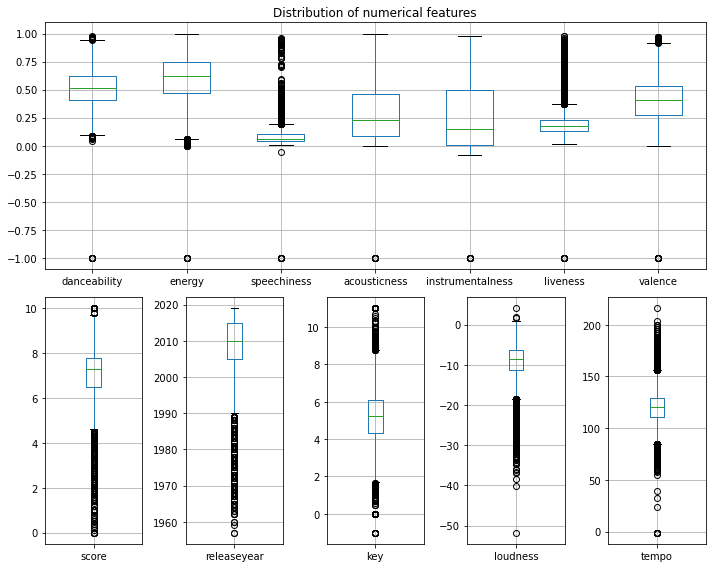

In [5]:
numeric_col = ['score', 'releaseyear', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
spotify_col =['danceability', 'energy',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']
plt.figure(figsize=(10,8))
albums.boxplot(column=spotify_col, ax=plt.subplot(2,1,1))
plt.title('Distribution of numerical features')

alone_col=['score', 'releaseyear','key', 'loudness','tempo']
for i,col in enumerate(alone_col):
    albums.boxplot(column=col, ax=plt.subplot(2, 5, 5 + i+1))

plt.tight_layout()


#### 1.4

In [6]:
albums.replace(to_replace={'genre':'none'}, value='Other', inplace=True)
albums.fillna(value={"genre":"Other"}, inplace=True)

cat_col = ['artist', 'album','reviewauthor', 'reviewdate',
       'recordlabel', 'genre']
#https://pbpython.com/pandas_dtypes_cat.html

cat_df = pd.DataFrame.from_records([(col, albums[col].nunique()) for col in cat_col],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

cat_df

,Column_Name,Num_Unique
5,genre,10
2,reviewauthor,554
4,recordlabel,3032
3,reviewdate,4876
0,artist,7892
1,album,16183


In [7]:
for i in range(len(cat_df)):
    if cat_df['Num_Unique'][i]<=10:
        print("List of " + cat_df['Column_Name'][i] + " :\n")
        print(albums[cat_df['Column_Name'][i]].unique())   

List of genre :

['Electronic' 'Folk/Country' 'Rock' 'Rap' 'Global' 'Experimental' 'Metal'
 'Pop/R&B' 'Jazz' 'Other']


#### 1.5 

  1. The way albums had been rated and chosen is not consistant and had changed in time. We see that they covered few albums from 1960-2000. 

        However, we see a spike starting around 2000 associated with a drop in the average score. This means that the albums covered before Pitchfork's creation (in 1995) were **selected** amongst the best, most succesful ones which results in **high average scores**.
    
        From 2000, they started reviewing a lot more albums (probably most album at their release) and resulted in a drastic drop in the scores. 
    
        This is also a problem in the sense that the way a 'past' album and a 'actual' album are reviewed is very **different**. 
    
        Indeed, when you review a album from the past, you **already have a sense** of the 'success' and 'probability' of the album but this is not the case when you review an album that has just came out.


2. An album is reviwed only by one reviewer, This is a problem in the sense that it depends on the reviewer's personality : on his tastes, his mood, his age ... On the Wikipedia page, we can read that the subjectivity of the review was criticized.


3. Finally, Pitchfork was oriented a lot toward indie rock style. This means that the choice of music reviewed is selected, and not representative of the albums released in general.

#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

#### 2.1

In [8]:
unique_genres = albums['genre'].unique()
for g in unique_genres:
    albums["{}_onehot".format(g)] = (albums['genre'].apply(lambda x: 1 if x == g else 0))
albums.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Folk/Country_onehot,Rock_onehot,Rap_onehot,Global_onehot,Experimental_onehot,Metal_onehot,Pop/R&B_onehot,Jazz_onehot,Other_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,...,0,1,0,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,...,0,0,1,0,0,0,0,0,0,0
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,1,0,0,0,0,0,0


#### 2.2

In [9]:
def numpy_helper(df, cols):
    return df[cols].to_numpy()

#### 2.3

In [10]:
onehot_col =['score', 'Electronic_onehot', 'Folk/Country_onehot',
       'Rock_onehot', 'Rap_onehot', 'Global_onehot', 'Experimental_onehot',
       'Metal_onehot', 'Pop/R&B_onehot', 'Jazz_onehot', 'Other_onehot']


album_model_features = numpy_helper(albums, onehot_col)


train_set, test_set = model_selection.train_test_split(album_model_features, random_state=123, train_size=0.7)

X_train = train_set[:, 1:]
y_train = train_set[:, 0]
X_test = test_set[:, 1:]
y_test = test_set[:, 0]

print("Number of data points in training set : ", len(train_set))
print("Number of data points in test set : ", len(test_set))

Number of data points in training set :  11716
Number of data points in test set :  5022


#### 2.4

In [11]:
# Functions for creating our baseline regressor

def least_squares(y, tx):
    """Calculate the least squares solution
        by returning optimal weights.
    """
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    w = np.linalg.solve(a, b)
    return w

def add_biais (x):
    x = np.c_[np.ones((x.shape[0],1)),x]
    return x

In [12]:
# We add a column of ones to account for the biais term
X_train_biais = add_biais(X_train)
X_test_biais = add_biais(X_test)

In [13]:
# Optimal weights
w = least_squares(y_train, X_train_biais)

In [14]:
# Finally we get our prediction
y_predicted = X_test_biais.dot(w)

#### 2.5

In [15]:
r2 = r2_score(y_test, y_predicted)
print("Coefficient of determination of our baseline on test data : {:.4f}".format(r2))

Coefficient of determination of our baseline on test data : 0.0143


#### 2.6 
The problem is that we applied a random split and we could have a subset that contain only albums with specific attributes (for example only a certain genre). So this would lead to overfitting. 

To avoid this, we should perform a cross validation.

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

#### 3.1

In [16]:
features = ["score", "releaseyear", "key", "acousticness", "danceability", 
            "energy", "instrumentalness", "liveness", "loudness", 
            "speechiness", "valence", "tempo",'Electronic_onehot', 'Folk/Country_onehot',
           'Rock_onehot', 'Rap_onehot', 'Global_onehot', 'Experimental_onehot',
           'Metal_onehot', 'Pop/R&B_onehot', 'Jazz_onehot', 'Other_onehot']
##probably clean this up 
model = LinearRegression()
random_train_set, random_test_set = model_selection.train_test_split(albums[features], random_state=123, train_size=0.7) 
model.fit(random_train_set.drop('score', inplace=False, axis=1), random_train_set['score'])

y_pred_random = model.predict(random_test_set.drop('score', inplace=False, axis=1))
r2_random=r2_score(random_test_set['score'], y_pred_random)
print('Value of R2 with random split : {:.4f}'.format(r2_random))

Value of R2 with random split : 0.0442


#### 3.2

In [17]:
longit_train_set = albums.loc[albums['releaseyear'] < 2000][features]
longit_test_set = albums.loc[albums['releaseyear'] >= 2003][features]

model.fit(longit_train_set.drop('score', inplace=False, axis=1), longit_train_set['score'])

y_pred_longit = model.predict(longit_test_set.drop('score', inplace=False, axis=1))
r2_long=r2_score(longit_test_set['score'], y_pred_longit)
print('Value of R2 with longitudinal split : {:.4f}'.format(r2_long))

Value of R2 with longitudinal split : -0.2832


#### Discussion 

A model that predicts exactly the value is one. A model predicting always the mean value has a $R^2$ value of 0.  
We have a negative $R^2$, this means that our model's predictions are worst than a model who would always predict the mean value. 

This can be explained because of the difference between the data before 2000 and the data after. We saw in task one that there was a radical change around 2000 : only a few reviews but very good rating before 2000 and after there were many more reviews with lower rating. Therefore training our model on the data before 2000 or on the data after gives very diffrent results.

#### 3.3

The 95% bootstrapped confidence interval is : [-3.95, 1.38].
The probability that the residual being contained in the [-2, 2] bracket is 88.57 %.


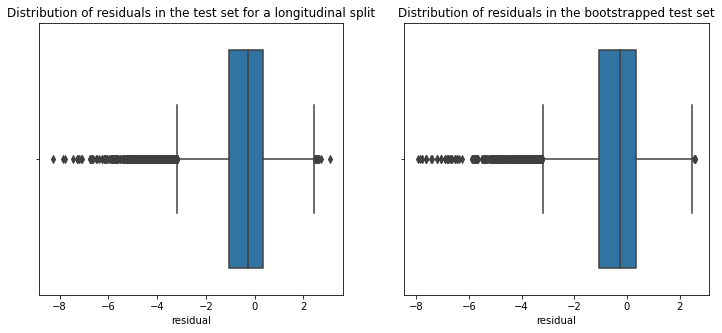

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=longit_test_set['score']-y_pred_longit, ax=ax[0])
ax[0].set_title("Distribution of residuals in the test set for a longitudinal split")
ax[0].set_xlabel("residual")

sample = albums.sample(10000, replace=True)[features]
score_bootstrap = sample['score'] - model.predict(sample.drop('score', inplace=False, axis=1))
score_bootstrap.sort_values(inplace=True, ignore_index=True)
print("The 95% bootstrapped confidence interval is : [{:.2f}, {:.2f}].".format(score_bootstrap.iloc[250], score_bootstrap.iloc[9750]))
idneg = score_bootstrap.sub(-2).abs().idxmin()
idpos = score_bootstrap.sub(2).abs().idxmin()
print("The probability that the residual being contained in the [-2, 2] bracket is {:.2f} %.".format((idpos-idneg)/100))
sns.boxplot(x=score_bootstrap, ax=ax[1])
ax[1].set_title("Distribution of residuals in the bootstrapped test set")
ax[1].set_xlabel("residual")

plt.show()

#### 3.4

In [19]:
model = GradientBoostingRegressor()
model.fit(longit_train_set.drop('score', inplace=False, axis=1), longit_train_set['score'])

y_pred_longit = model.predict(longit_test_set.drop('score', inplace=False, axis=1))
r2_grad=r2_score(longit_test_set['score'], y_pred_longit)
print('Value of R2 with longitudinal split and Gratient Boosting Regressor : {:.4f}'.format(r2_grad))

Value of R2 with longitudinal split and Gratient Boosting Regressor : -0.4213


#### 3.5

A negative $R^2$ can be interpreted as the fact that the model fits the data worse than predicting the average would. The $R^2$ being worse for the Gradient Boosting Regressor than it is for Linear Regression could come from the fact that the GBR fits the training data better. However, since our training set and our test set are can be different (cf. task1), our predictions end up being worse than a model that didn't fit the training data as closely (overfitting).

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

#### 4.1

In [20]:
artist_vc = albums['artist'].value_counts()
more_album = albums.loc[albums['artist'].isin(artist_vc[artist_vc > 1].index)].sort_values('releaseyear')
last_album = more_album.groupby('artist', as_index=False).last()

old_album = pd.concat([more_album, last_album], axis=0).drop_duplicates(keep=False)

assert(len(old_album) + len(last_album) == len(more_album))

old_album = old_album.groupby('artist', as_index=False).mean()

assert(len(old_album) == len(last_album))

joined_albums = pd.merge(old_album, last_album, on='artist', suffixes=('_previous', ''))
joined_albums.head()

,artist,score_previous,releaseyear_previous,danceability_previous,energy_previous,key_previous,loudness_previous,speechiness_previous,acousticness_previous,instrumentalness_previous,...,Electronic_onehot,Folk/Country_onehot,Rock_onehot,Rap_onehot,Global_onehot,Experimental_onehot,Metal_onehot,Pop/R&B_onehot,Jazz_onehot,Other_onehot
0,!!!,6.871429,2009.285714,0.702481,0.817128,5.559668,-6.456197,0.075978,0.069859,0.183817,...,0,0,1,0,0,0,0,0,0,0
1,(Sandy) Alex G,8.400000,2017.000000,0.461143,0.588929,6.071429,-7.042714,0.049843,0.283422,0.313242,...,0,0,1,0,0,0,0,0,0,0
2,...And You Will Know Us by the Trail of Dead,7.170000,2005.600000,0.452275,0.617621,4.640999,-7.376548,0.058137,0.222795,0.200996,...,0,0,1,0,0,0,0,0,0,0
3,03 Greedo,7.866667,2018.333333,0.723779,0.529129,4.704545,-7.953956,0.160465,0.136049,0.003679,...,0,0,0,1,0,0,0,0,0,0
4,13 & God,8.100000,2005.000000,0.626600,0.572700,4.500000,-11.962400,0.064900,0.477700,0.433760,...,0,0,0,0,0,1,0,0,0,0


#### 4.2

In [21]:
model = GradientBoostingRegressor()
joined_albums_train, joined_albums_test = model_selection.train_test_split(joined_albums, test_size=0.3)

joined_albums_train.drop([ 'artist', 'reviewauthor', 'releaseyear',
       'reviewdate', 'recordlabel', 'genre', 'danceability', 'album'], inplace=True, axis=1)
joined_albums_test.drop([ 'artist', 'reviewauthor', 'releaseyear',
       'reviewdate', 'recordlabel', 'genre', 'danceability', 'album'], inplace=True, axis=1)

model.fit(joined_albums_train.drop(['score'], inplace=False, axis=1), joined_albums_train['score'])

y_pred = model.predict(joined_albums_test.drop(['score'], inplace=False, axis=1))
r2_grad_random=r2_score(joined_albums_test['score'], y_pred)
print('Value of R2 with random split : {:.4f}'.format(r2_grad_random))

Value of R2 with random split : 0.1920


#### 4.3

In [22]:
n_estimators = [100, 200, 300, 400]
learning_rate = [0.1, 0.05, 0.01]

def k_fold_cv(df, mod, y_label, k=20):
    kf = model_selection.KFold(n_splits=k)
    avg_r2 = np.array([])
    for train_index, test_index in kf.split(df):
        test_set, train_set = df.iloc[test_index], df.iloc[train_index]
        mod.fit(train_set.drop([y_label], inplace=False, axis=1), train_set[y_label])
        y_pred = mod.predict(test_set.drop([y_label], inplace=False, axis=1))
        avg_r2 = np.append(avg_r2, r2_score(test_set[y_label], y_pred))
    avg_r2.sort()
    return avg_r2.mean(), avg_r2[1], avg_r2[18]


def tune_hyperparams():
    r2_df = pd.DataFrame(columns=['learning_rate', 'n_estimators', 'r2', '5%_CI', '95%_CI'])
    for est in n_estimators:
        for lr in learning_rate:
            model = GradientBoostingRegressor(n_estimators=est, learning_rate=lr)
            r2, five, ninety_five = k_fold_cv(joined_albums.drop([ 'artist', 'reviewauthor', 'releaseyear',
                'reviewdate', 'recordlabel', 'genre', 'album'], inplace=False, axis=1), model, 'score')
            r2_df.loc[len(r2_df)] = [lr, est, r2, five, ninety_five]
            #print(est, lr, r2)
    return r2_df
            
r2_df = tune_hyperparams()

In [23]:
r2_df

,learning_rate,n_estimators,r2,5%_CI,95%_CI
0,0.10,100.0,0.178286,0.042642,0.322877
1,0.05,100.0,0.189460,0.071882,0.291981
2,0.01,100.0,0.154003,0.071264,0.224043
3,0.10,200.0,0.159375,0.013675,0.319463
4,0.05,200.0,0.179154,0.040355,0.303014
5,0.01,200.0,0.179019,0.077190,0.270255
6,0.10,300.0,0.143191,-0.021440,0.294647
7,0.05,300.0,0.165812,0.013923,0.315004
8,0.01,300.0,0.186075,0.077703,0.275379
9,0.10,400.0,0.133154,-0.051430,0.304834


We get the better results for lerning rate = 0.05 and 100 estimators

In [24]:
best_parameters = r2_df.iloc[r2_df['r2'].idxmax()]

In [25]:
model = GradientBoostingRegressor(n_estimators=int(best_parameters['n_estimators']), learning_rate=best_parameters['learning_rate'])

In [26]:
model.fit(joined_albums_train.drop(['score'], inplace=False, axis=1), joined_albums_train['score'])
y_pred = model.predict(joined_albums_test.drop(['score'], inplace=False, axis=1))
r2_grad_random = r2_score(joined_albums_test['score'], y_pred)
print('Value of R2 with Optimum prameters: {:.4f}'.format(r2_grad_random))

Value of R2 with Optimum prameters: 0.2017


#### 4.4

It is hard to compare those two scenarios since we do not train model with the same sample. In the previous task we split our data in way such that it was two different kinds of data. Here the data are randomly split in two different groups. We can then assume that our training and testing sample are more similar. 

Furthermore the samples do not have the same size or even proportionality. We have here a training set with 70% of the data. In the previous task, there was more data in the testing set than in the training one.

To fairly compare the two setups, we should test them on the same samples.

## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

#### 5.1

In [27]:
albums = pd.read_csv(data_path, compression="gzip")
albums.drop_duplicates(subset=['artist', 'album'], keep='first', inplace=True)
albums.dropna(subset=["releaseyear"])

artist_vc = albums['artist'].value_counts()
albums = albums.loc[albums['artist'].isin(artist_vc[artist_vc > 1].index)].sort_values('releaseyear')
albums.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1497,Thelonious Monk,Monk’s Music,Ben Ratliff,9.1,1957.0,March 12 2017,Riverside,Jazz,0.496125,0.145211,6.50,-18.9690,0.04955,0.763875,0.232469,0.118913,0.356538,114.39750
618,Ornette Coleman,This Is Our Music,Mark Richardson,9.4,1960.0,March 25 2002,Atlantic,Jazz,0.235900,0.574500,3.50,-8.3975,0.03217,0.039747,0.390400,0.178600,0.249100,134.27530
10987,Françoise Hardy,Tous Les Garçons Et Les Filles,Hazel Cills,8.6,1962.0,October 21 2015,Light in the Attic,Pop/R&B,0.361000,0.512000,9.00,-7.9020,0.02790,0.867000,0.002370,0.146000,0.150000,160.03700
7887,Ornette Coleman,Ornette!,Alex Linhardt,8.8,1962.0,March 11 2004,Atlantic,Jazz,0.523800,0.356200,6.00,-16.0876,0.04454,0.644000,0.178235,0.284580,0.692800,128.11720
14546,The Beatles,With the Beatles,Tom Ewing,8.8,1963.0,September 8 2009,EMI,Rock,0.563800,0.164580,4.95,-16.8513,0.05846,0.976250,0.915350,0.109595,0.377100,128.44195


#### 5.2

In [28]:
albums['album_number'] = 0
artist_dict = dict.fromkeys(albums['artist'], 0)
for i, row  in albums.iterrows():
    albums.at[i, 'album_number'] = artist_dict[row['artist']]
    artist_dict[row['artist']] = artist_dict[row['artist']] +1

#### 5.3

First Album
Mean : 7.30   ;   STD : 1.24

Second Album
Mean : 7.04   ;   STD : 1.27


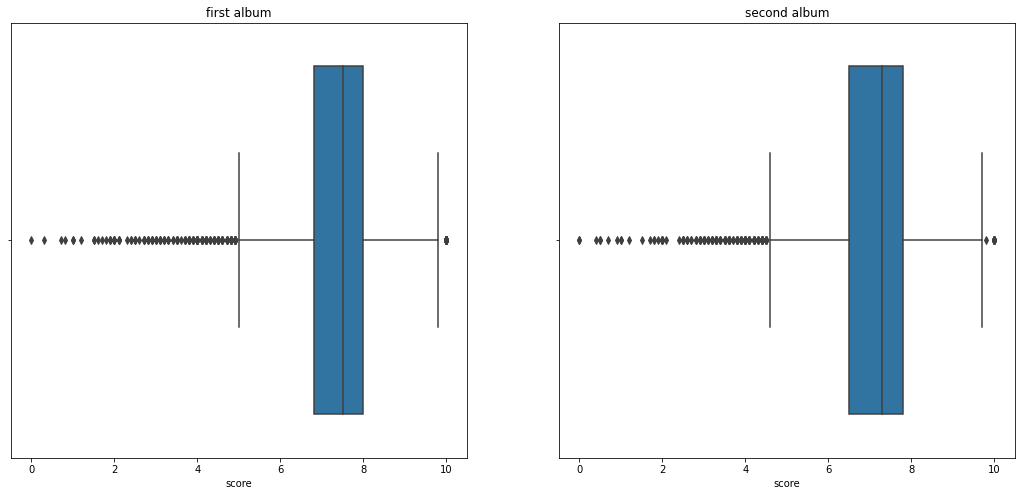

In [29]:
def mean_std(df, col):
    print("Mean : {:.2f}   ;   STD : {:.2f}".format(df[col].mean(), df[col].std()))

def nth_album(df, n):
    return df.loc[df['album_number'] == n]

first_album = nth_album(albums, 0)
second_album = nth_album(albums, 1)

print("First Album")
mean_std(first_album, 'score')
print("\nSecond Album")
mean_std(second_album, 'score')

plt.figure(figsize=(18,8))
ax1=sns.boxplot(x=first_album['score'], ax=plt.subplot(1, 2, 1))
ax2=sns.boxplot(x=second_album['score'], ax=plt.subplot(1, 2, 2))
ax1.set_title('first album')
ax2.set_title('second album')
plt.show()

#### 5.4

According to the central limit theorem, means of samples from a dataset with a finite variance will approximate a normal distribution, even though the samples do not necessarily follow a normal distribution. 

As we have far more than 50 data points we are in the context of the central limit theorem, so the t-test is appropriated for our task.

In [30]:
ttest_ind(first_album['score'], second_album['score'])

Ttest_indResult(statistic=8.6801150888397, pvalue=4.843510495814596e-18)

#### 5.5

Our test shows that there is a statistically significant difference between the scores of the first and the second album.  

Since the mean value of the second album is lower than the first one, this suggests that the second album is indeed worst than the first one and that the second album syndrome exists.

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


#### 6.1

In [31]:
album_pair = pd.merge(first_album, second_album, on="artist")
album_pair['score_diff'] = album_pair['score_y'] - album_pair['score_x']
album_pair['time_diff']= (album_pair['releaseyear_y'] - album_pair['releaseyear_x']) * 365
style_feat = [ "key", "acousticness", "danceability", 
              "energy", "instrumentalness", "liveness", 
              "loudness", "speechiness", "valence", "tempo"]
style_feat_x = ["{}_x".format(x) for x in style_feat]
style_feat_y = ["{}_y".format(y) for y in style_feat]

distance = euclidean_distances(album_pair[style_feat_x], album_pair[style_feat_y])
distance = distance.diagonal()
distance_min = pd.Series(distance).nlargest(int(len(distance)*0.2)).min()

album_pair['distance'] = distance
album_pair['did_style_change'] = album_pair.apply(lambda x: 1 if x['distance'] > distance_min else 0 , axis=1)
album_pair= album_pair [['artist', 'did_style_change', 'time_diff', 'score_diff']]

album_pair.head()

,artist,did_style_change,time_diff,score_diff
0,Thelonious Monk,0,21900.0,-0.4
1,Ornette Coleman,0,730.0,-0.6
2,Françoise Hardy,1,20440.0,-2.1
3,The Beatles,0,0.0,0.7
4,James Brown,0,14600.0,-1.4


#### 6.2

In [32]:
model = smf.ols(formula='score_diff ~ 1', data=album_pair)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        17:28:58   Log-Likelihood:                -6202.6
No. Observations:                3564   AIC:                         1.241e+04
Df Residuals:                    3563   BIC:                         1.241e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2579      0.023    -11.161      0.000      -0.303      -0.213
==============================================================================
Omnibus:                      402.611   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2233.136
Skew:                          -0.391   Prob(JB):                         0.00
Kurtosis:                       6.798   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6.3

In this model without parameters, the bias of this model is negative so the second album tends to be worse than the first one. However, the $R^2$ score has a value of 0. This means that none of the variance in the dataset is being explained, so there must be some variable explaining the drop in album score.

#### 6.4 

In [33]:
model = smf.ols(formula='score_diff ~ time_diff + C(did_style_change)', data=album_pair)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     34.56
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.37e-15
Time:                        17:28:58   Log-Likelihood:                -6168.3
No. Observations:                3564   AIC:                         1.234e+04
Df Residuals:                    3561   BIC:                         1.236e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.1483      0.030     -5.019      0.000      -0.206      -0.090
C(did_style_change)[T.1]     0.0602      0.057      1.052      0.293      -0.052       0.173
time_diff                -9.264e-05   1.12e-05     -8.244      0.000      -0.000   -7.06e-05
==============================================================================
Omnibus:                      369.830   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2080.507
Skew:                          -0.326   Prob(JB):                         0.00
Kurtosis:                       6.686   Cond. No.                     6.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 6.5

The time_diff coefficient is negative, which can be interpreted as score decreasing the longer the wait between albums. This could be explained by fans getting "hyped" and enhancing the memory of the first album through "nostalgia goggles". It is however very small, so its effect isn't major. The value of the did_style_change coefficient is positive, so an album that has a different style generally performs better than the first one. However, the p-value associated with this coefficient is superior to 0.05, so this influence could be due to chance.

The $R^2$ score is now 0.019, so there still are missing variables in predicting the score to explain the variance.

#### 6.6

In [34]:
album_pair['time_diff_standardized'] = (album_pair['time_diff'] - album_pair['time_diff'].mean())/album_pair['time_diff'].std()

model = smf.ols(formula='score_diff ~ time_diff_standardized + C(did_style_change)', data=album_pair)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     34.56
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.37e-15
Time:                        17:28:58   Log-Likelihood:                -6168.3
No. Observations:                3564   AIC:                         1.234e+04
Df Residuals:                    3561   BIC:                         1.236e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.2699      0.026    -10.549      0.000      -0.320      -0.220
C(did_style_change)[T.1]     0.0602      0.057      1.052      0.293      -0.052       0.173
time_diff_standardized      -0.1887      0.023     -8.244      0.000      -0.234      -0.144
==============================================================================
Omnibus:                      369.830   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2080.507
Skew:                          -0.326   Prob(JB):                         0.00
Kurtosis:                       6.686   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6.7 

For the time_diff coeff, the results suggest that the longer you take to release your second album, the more your score drops. For the standardized version, if your second album releases sooner than the average, your  score is higher.

The difference could be explained by the fact that there are remastered albums in the dataset with very large time_diff values. The standardized version thus handles better this distribution.


**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


#### 7.1

We would expect the mean score of the third album to be greater than the mean score of the second album, because we suppose that some particular reasons impacted the second album.

#### 7.2

In [35]:
for i in range (0,4):
    print("Album n°", i+1, end='    ')
    mean_std(nth_album(albums, i), 'score')
    
ttest_ind(nth_album(albums, 2)['score'], nth_album(albums, 3)['score'])

Album n° 1    Mean : 7.30   ;   STD : 1.24
Album n° 2    Mean : 7.04   ;   STD : 1.27
Album n° 3    Mean : 7.05   ;   STD : 1.22
Album n° 4    Mean : 7.04   ;   STD : 1.23


Ttest_indResult(statistic=0.13167355054277005, pvalue=0.895250980626538)

#### 7.3

The T-test gives a **p-value ~ 0.9 > 0.05**. So we can not reject the null hypothesis that states that "The difference between the average score of the second and the third album is statistically significant" .

To conclude, this doesn't suggest that the Second Album Syndrome exists.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

In [36]:
bands = pd.DataFrame(np.random.uniform(low=2, high=8, size=1000), columns=['band_talent'])
bands['album_1'] = bands.apply(lambda x: np.random.normal(x))
old_mean = bands['band_talent'].mean()
print("Album 1 mean and std over the whole set : ")
mean_std(bands, 'album_1')
bands = bands.loc[bands['album_1']>=6]
print("\n")
print("Number of bands left: {}\n".format(len(bands)))
bands['album_2'] = bands.apply(lambda x: np.random.normal(x['band_talent']), axis=1)
bands['album_3'] = bands.apply(lambda x: np.random.normal(x['band_talent']), axis=1)

print("After keeping bands that released an album with a score greater or equal to 6 :")
print("Album n°1)", end='   ')
mean_std(bands, 'album_1')
print("Album n°2)", end='   ')
mean_std(bands, 'album_2')
print("Album n°3)", end='   ')
mean_std(bands, 'album_3')
print("\n")

print("The mean of band talent used to be {:.2f} but is now {:.2f} after we cut 'worse' bands.".format(old_mean, bands['band_talent'].mean()))

Album 1 mean and std over the whole set : 
Mean : 4.93   ;   STD : 1.98


Number of bands left: 334

After keeping bands that released an album with a score greater or equal to 6 :
Album n°1)   Mean : 7.18   ;   STD : 0.83
Album n°2)   Mean : 6.60   ;   STD : 1.33
Album n°3)   Mean : 6.61   ;   STD : 1.32


The mean of band talent used to be 4.95 but is now 6.73 after we cut 'worse' bands.


#### Discussion : 

As we can see, even on generated data the second album tends to be worse than the first one. All subsequent albums tend to have similar scores to the second one. This could be explained by the fact that we only keep bands that made an album with a score superior to 6. In real life, this could be caused by bands not pursuing a career in music if their first album 'bombs'. When filtering the bands to keep after the first album, we only keep bands that released an album within their talent range and bands that made an album way above their base talent. The phenomenon we observed is a regression to the mean, in which after an extreme result for a random variable the next sample tends to be closer to the mean. This is illustrated by the fact that the mean of selected band talents is around 6.7, which is close to the 2nd and 3rd album but far below the 1st one.